In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from scipy.interpolate import make_interp_spline


In [2]:
def set_plot_ax(ax):
    ax.yaxis.label.set_size(14)
    ax.yaxis.label.set_fontweight('bold')
    ax.xaxis.label.set_size(14)
    ax.xaxis.label.set_fontweight('bold')
    ax.title.set_fontsize(16)
    ax.title.set_fontweight('bold')
    for label in ax.get_yticklabels():
        label.set_fontsize(12)
        label.set_fontweight('bold')

    for tick in ax.get_xticklabels():
        # tick.set_rotation(15)
        tick.set_fontsize(12)
        tick.set_fontweight('bold')

    for label in ax.get_yticklabels():
        label.set_fontweight('bold')
        label.set_fontsize(12)  

In [3]:
def fake_arr(arr):

    fake = np.zeros(len(arr) * 2 - 1)
    for i in range(len(arr)):
        fake[i * 2] = arr[i]
        if i < len(arr) - 1:
            fake[i * 2 + 1] = (arr[i] + arr[i + 1]) / 2

    return fake

fake_arr([1, 2, 3, 4, 5])

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [4]:
def fake_arr2(arr):
    # First iteration: Double the points by adding midpoints
    fake = np.zeros(len(arr) * 2 - 1)
    for i in range(len(arr)):
        fake[i * 2] = arr[i]
        if i < len(arr) - 1:
            fake[i * 2 + 1] = (arr[i] + arr[i + 1]) / 2
    
    # Second iteration: Double the points again by adding midpoints
    result = np.zeros(len(fake) * 2 - 1)
    for i in range(len(fake)):
        result[i * 2] = fake[i]
        if i < len(fake) - 1:
            result[i * 2 + 1] = (fake[i] + fake[i + 1]) / 2
    
    return result


fake_arr2([1, 2, 3, 4, 5])

array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
       3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ])

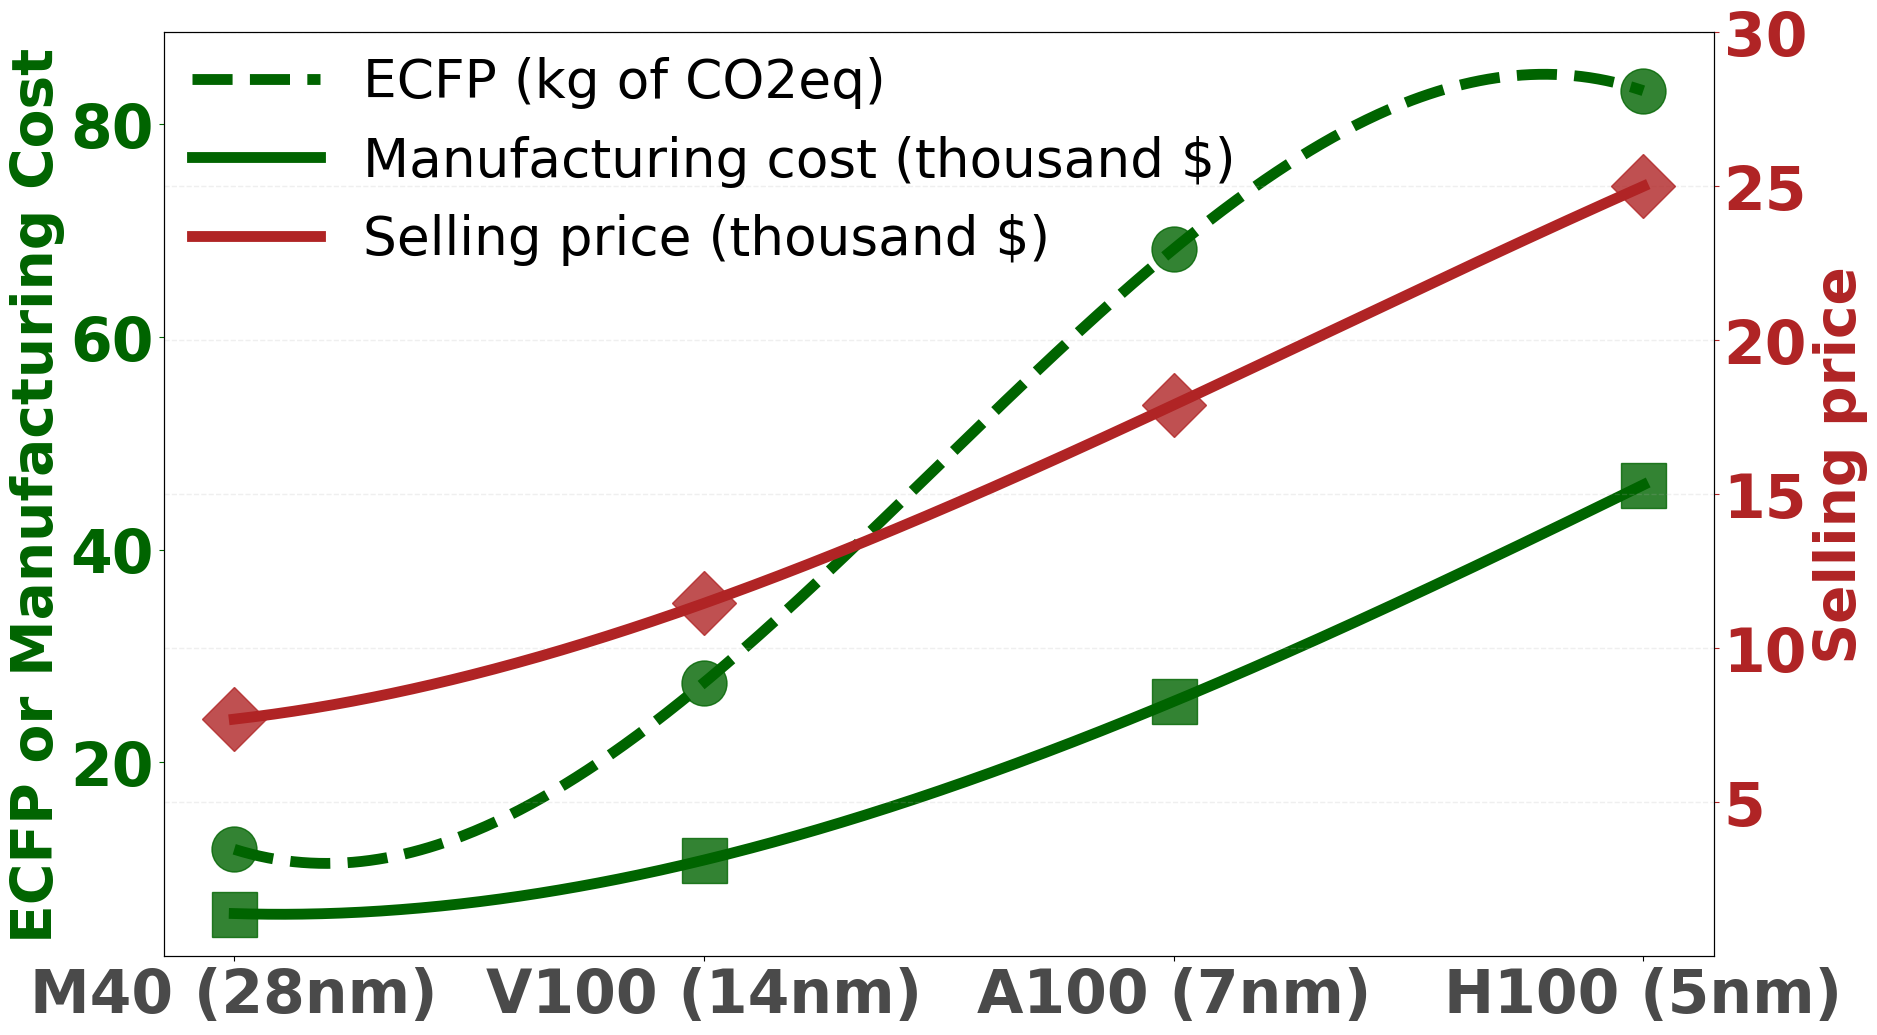

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Read the CSV file into a pandas DataFrame
file_path = 'CFPA_vs_Cost.csv'  # Replace with your actual file path
nv_data = pd.read_csv(file_path)

# Renaming columns for simplicity and removing spaces from headers
nv_data.columns = ['Name', 'ECFP', 'Mfg Cost', 'Selling Price']

# Define the plotting function
def normalized_perf_plot(nv):
    FACTOR = 1.2
    TITLE_FONT_SIZE = 35 * FACTOR
    LABEL_FONT_SIZE = 36 * FACTOR
    TICK_FONT_SIZE = 36 * FACTOR
    AXIS_LABEL_FONT_SIZE = 34 * FACTOR
    LEGEND_FONT_SIZE = 32 * FACTOR
    LINE_WIDTH = 6.5 * FACTOR
    MARKER_SIZE = 27 * FACTOR

    # Colors for each data set
    COLOR_1 = '#006400'  # Green (CFP)
    COLOR_2 = '#B02425'  # Red (Price)
    COLOR_3 = '#006400'  # Blue (Cost)

    SPLINE = 3

    # Set figure size
    fig_width = 20
    fig_height = 12

    # Create figure and main axes
    fig, ax1 = plt.subplots(figsize=(fig_width, fig_height))
    ax2 = ax1.twinx()  # Create a secondary y-axis for the Price data

    # Prepare data for smooth interpolation
    x_data = np.arange(len(nv['Name']))
    x_labels = nv['Name']
    x_smooth = np.linspace(x_data.min(), x_data.max(), 500)

    # Plot 1: CFP on the primary y-axis
    y_cfp = nv['ECFP']
    spline_cfp = make_interp_spline(x_data, y_cfp, k=SPLINE)
    y_cfp_smooth = spline_cfp(x_smooth)
    ax1.plot(x_smooth, y_cfp_smooth, label='ECFP (kg of CO2eq)', color=COLOR_1, linewidth=LINE_WIDTH, linestyle="--")
    ax1.plot(x_data, y_cfp, 'o', markersize=MARKER_SIZE, color=COLOR_1, alpha=0.8)

    # Plot 2: Cost on the primary y-axis
    y_cost = nv['Mfg Cost']
    spline_cost = make_interp_spline(x_data, y_cost, k=SPLINE)
    y_cost_smooth = spline_cost(x_smooth)
    ax1.plot(x_smooth, y_cost_smooth, label= 'Manufacturing cost (thousand $)', color=COLOR_3, linewidth=LINE_WIDTH)
    ax1.plot(x_data, y_cost, 's', markersize=MARKER_SIZE, color=COLOR_3, alpha=0.8)

    # Plot 3: Price on the secondary y-axis
    y_price = nv['Selling Price']
    spline_price = make_interp_spline(x_data, y_price, k=SPLINE)
    y_price_smooth = spline_price(x_smooth)
    ax2.plot(x_smooth, y_price_smooth, label='Selling price (thousand $)', color=COLOR_2, linewidth=LINE_WIDTH)
    ax2.plot(x_data, y_price, 'D', markersize=MARKER_SIZE, color=COLOR_2, alpha=0.8)

    # Configure primary y-axis (CFP and Cost)
    ax1.set_ylabel('ECFP or Manufacturing Cost', fontsize=AXIS_LABEL_FONT_SIZE, fontweight='bold', color=COLOR_1)
    ax1.tick_params(axis='y', labelsize=TICK_FONT_SIZE, colors=COLOR_1)  # Set tick color to green
    for label in ax1.get_yticklabels():
        label.set_fontweight('bold')

    ax2.set_ylabel('   Selling price', fontsize=AXIS_LABEL_FONT_SIZE, fontweight='bold', color=COLOR_2)
    ax2.tick_params(axis='y', labelsize=TICK_FONT_SIZE, colors=COLOR_2)  # Set tick color to red
    ax2.set_ylim(bottom=0)  # Ensure the y-axis starts at 5
    ticks = ax2.get_yticks()
    ax2.set_yticks(ticks[ticks > 0])  # Filter out ticks less than or equal to 5
    for label in ax2.get_yticklabels():
        label.set_fontweight('bold')
    # Common X-axis
    # Common X-axis
   
    ax1.set_xticks(x_data)
    ax1.set_xticklabels(x_labels, fontsize=TICK_FONT_SIZE, fontweight='bold', ha='center', color='#4a4a4a')


    # Combine legends from ax1 and ax2
    handles_ax1, labels_ax1 = ax1.get_legend_handles_labels()
    handles_ax2, labels_ax2 = ax2.get_legend_handles_labels()
    handles = handles_ax1 + handles_ax2
    labels = labels_ax1 + labels_ax2

    # Unified legend
    fig.legend(handles, labels, loc='upper center', fontsize=LEGEND_FONT_SIZE, frameon=False, ncol=1, bbox_to_anchor=(0.4, 0.9), handlelength = 2.4)

    # Grid and title
    plt.grid(visible=True, linestyle='--', linewidth=1, alpha=0.2)
 
    return fig

# Generate and show the plot
fig = normalized_perf_plot(nv_data)
fig.savefig('CFPA_vs_Cost.pdf', dpi=300, bbox_inches='tight')
plt.show()
